In [2]:
import pandas as pd  # Importing pandas library for data manipulation and analysis
import numpy as np  # Importing numpy library for numerical computations
import matplotlib.pyplot as plt  # Importing matplotlib library for plotting
import seaborn as sns  # Importing seaborn library for data visualization
from scipy.interpolate import make_interp_spline  # Importing make_interp_spline for interpolation
import statsmodels.api as sm  # Importing statsmodels library for statistical modeling

from sklearn.model_selection import train_test_split, cross_validate  # Importing train_test_split and cross_validate for data splitting and validation
from sklearn.linear_model import LinearRegression, Lasso, Ridge  # Importing linear regression models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Importing metrics for model evaluation
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  # Importing random forest models

from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder for encoding categorical variables
from sklearn.metrics import accuracy_score, classification_report, make_scorer, precision_score, recall_score, f1_score  # Importing metrics for classification evaluation

%matplotlib inline  # Enabling inline plotting in Jupyter Notebook

import warnings  # Importing warnings module
warnings.filterwarnings("ignore")  # Suppressing warning messages


UsageError: unrecognized arguments: # Enabling inline plotting in Jupyter Notebook


In [3]:
#Loading the Dataset
df = pd.read_csv("Video_Games.csv")

In [4]:
#Reading the first five rows
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
# How many rows and columns are in the dataset 
df.shape

(16719, 16)

There are 16719 rows , 16 columns

In [6]:
#Descriptive Statistic(Getting a simple description of the dataset)
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [7]:
#Checking for Missing Values
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

The dataset has varying counts of missing values across columns, with "Critic_Score" and "Critic_Count" having 8582 missing values each, "User_Count" having 9129 missing values, and other columns like "User_Score," "Developer," and "Rating" also exhibiting substantial missing data.

# Data Cleaning

In [8]:
# Convert 'User_Score' to numeric, ignoring errors to handle non-numeric values
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Fill missing values in numerical columns with the mean
df['Critic_Score'].fillna(df['Critic_Score'].mean(), inplace=True)
df['Critic_Count'].fillna(df['Critic_Count'].mean(), inplace=True)
df['User_Score'].fillna(df['User_Score'].mean(), inplace=True)
df['User_Count'].fillna(df['User_Count'].mean(), inplace=True)

# Drop other rows that are missing
df.dropna(inplace=True)

# Exploring the Data

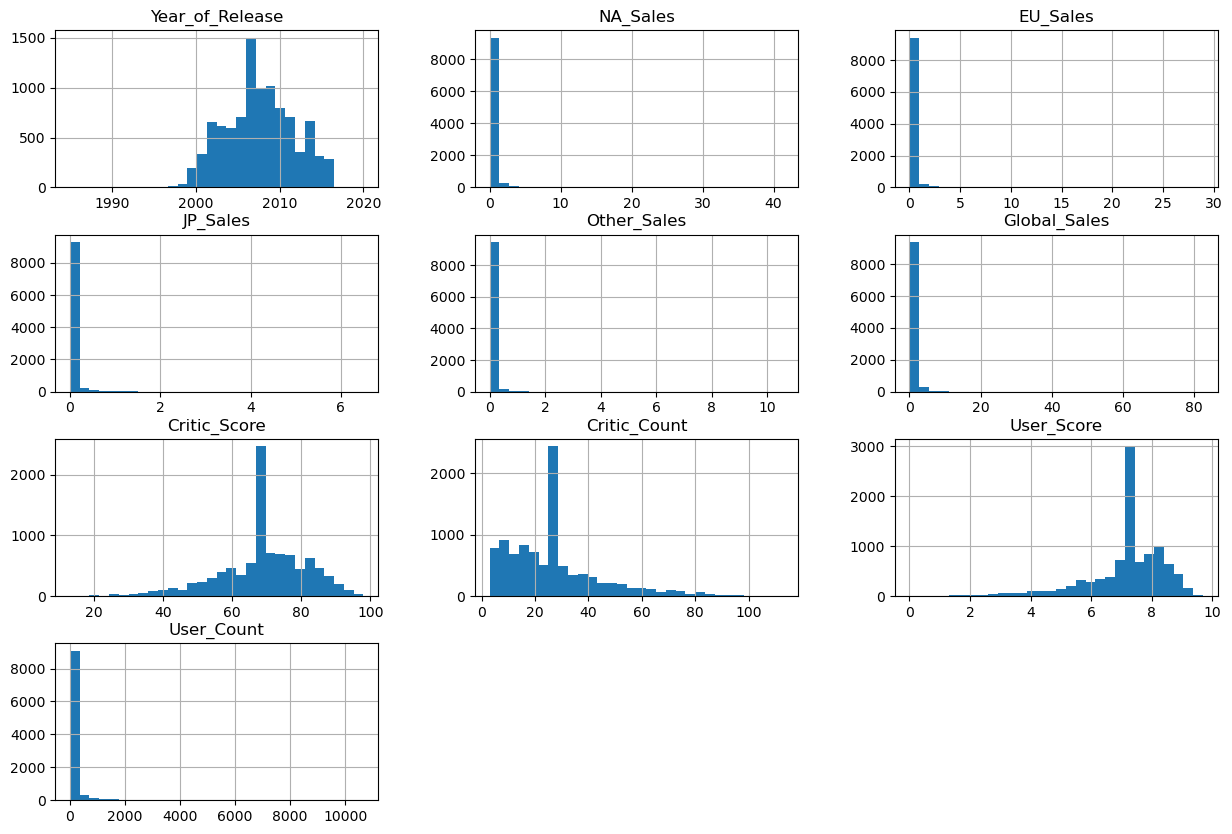

In [9]:
# Distribution of All Numerical
df.hist(bins=30, figsize=(15, 10))
plt.show()


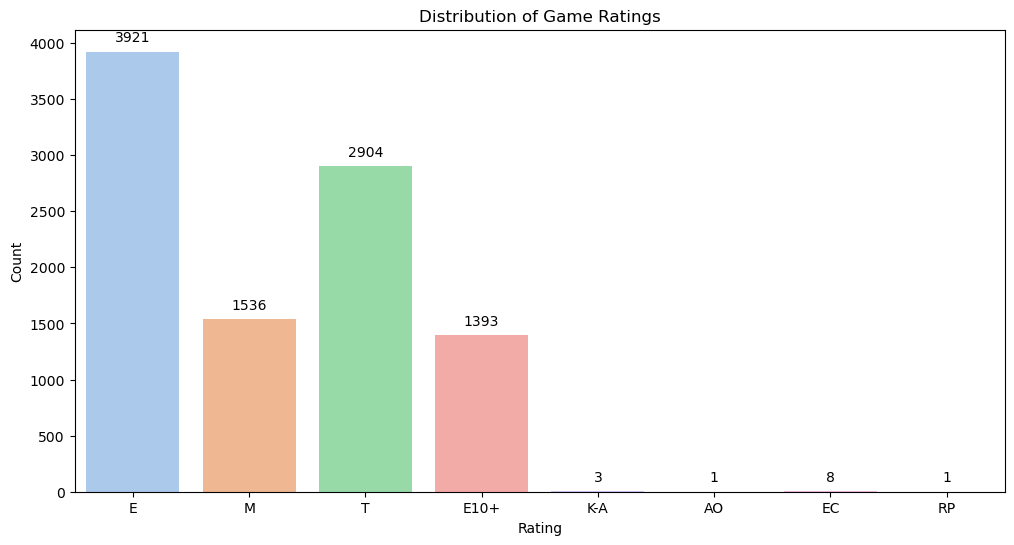

In [10]:
# Plot the distribution of the target variable 'Rating'
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Rating', data=df, palette=sns.color_palette("pastel"))

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

plt.title('Distribution of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


The bar chart illustrates the distribution of video game ratings within your dataset. The x-axis represents different rating categories, while the y-axis shows the number of games in each category.

From the chart, it's evident that the 'E' (Everyone) rating is the most common, with 3,920 games. The 'T' (Teen) rating follows, with 2,904 games. The 'M' (Mature) rating has 1,536 games, and the 'E10+' (Everyone 10 and older) rating has 1,393 games. 

The categories 'K-A' (Kids to Adults), 'AO' (Adults Only), 'EC' (Early Childhood), and 'RP' (Rating Pending) have significantly fewer games, with counts of 3, 1, 8, and 1 respectively.

This distribution shows a heavy skew towards 'E', 'T', 'M', and 'E10+' ratings, indicating that most games are targeted at younger or general audiences. The imbalance in the distribution highlights the importance of considering class imbalance when developing a classification model, as it may affect the model's performance and bias.

## Frequency of Video Games Over Years

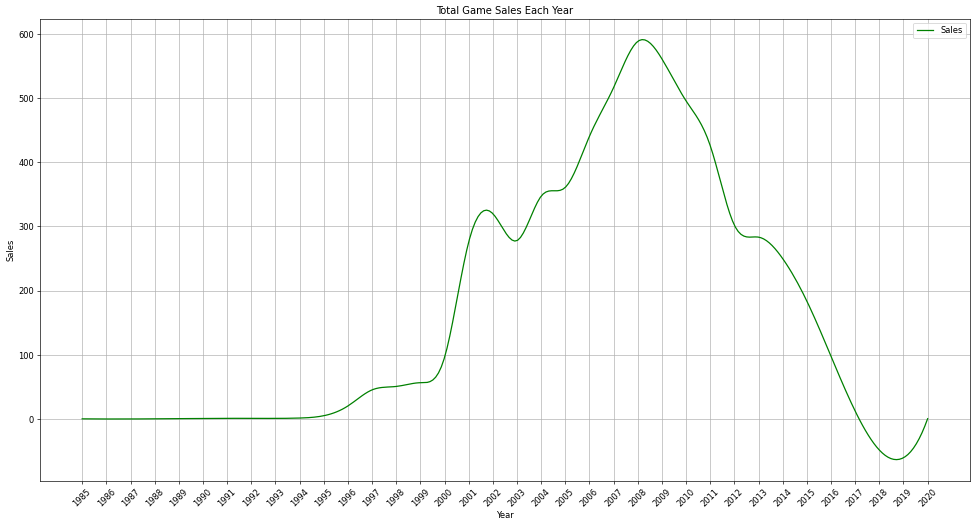

In [11]:
# Grouping the data by 'Year_of_Release' and summing up the numerical columns
sales_df = df.groupby('Year_of_Release', as_index=False).sum()
x_axis = sales_df['Year_of_Release']
y_axis = sales_df['Global_Sales']

# Interpolation
x_new = np.linspace(x_axis.min(), x_axis.max(), 300)  # 300 points for smooth curve
spl = make_interp_spline(x_axis, y_axis, k=3)  # k=3 for cubic spline
y_smooth = spl(x_new)

plt.figure(figsize=(20, 10), dpi=60)

# Plotting the smoothed data
plt.plot(x_new, y_smooth, label='Sales', color='green')

# Setting the title of the plot to 'Total Game Sales Each Year'
plt.title('Total Game Sales Each Year')

# Adding labels to the axes
plt.xlabel('Year')
plt.ylabel('Sales')

# Making x-axis labels more visible
plt.xticks(ticks=np.arange(x_axis.min(), x_axis.max() + 1, 1), rotation=45)

# Adding gridlines
plt.grid(True)

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()


The line chart visualizes the total number of game releases each year from 1985 to 2020. The x-axis represents the years, while the y-axis shows the count of games released per year, ranging from 0 to 1000. The bars are color-coded to differentiate between different periods. 

From 1985 to 1999, the number of game releases was relatively low, with counts well below 200 games per year. From 2000 to 2005, there was a noticeable increase in game releases, with counts rising from around 200 to 600 games per year. The period from 2006 to 2010 shows a significant peak, with counts close to or above 1000 games per year, with 2008 and 2009 having the highest number of game releases. 

After 2010, there is a decline in game releases, with counts gradually decreasing each year from 2011 to 2016.

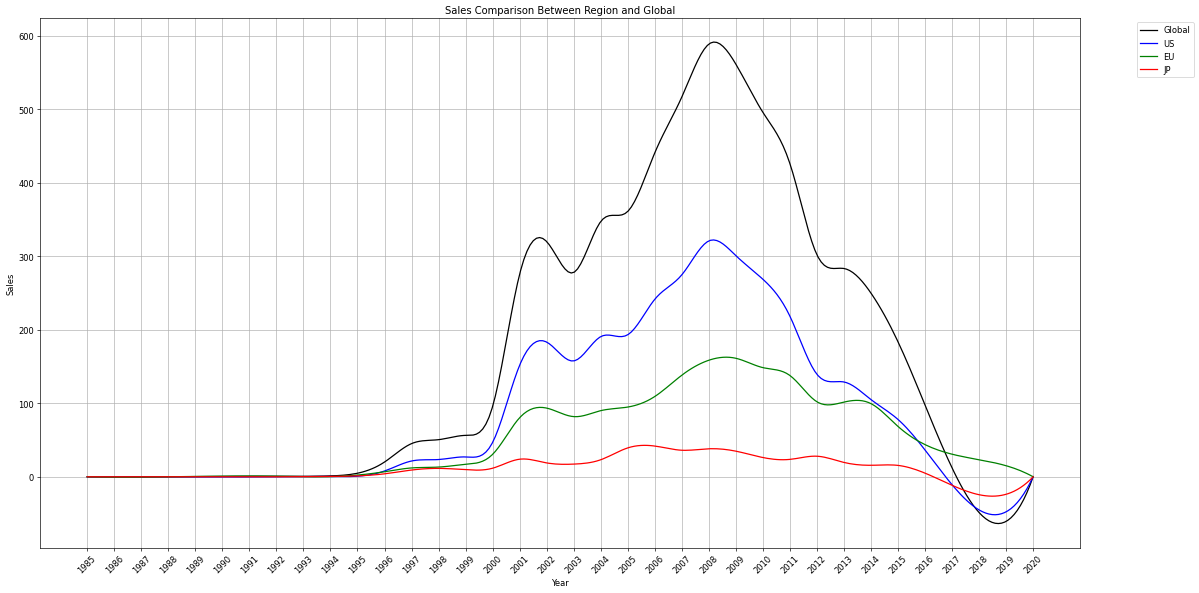

In [12]:
x_axis = sales_df['Year_of_Release']
na = sales_df['NA_Sales']
eu = sales_df['EU_Sales']
jp = sales_df['JP_Sales']
total = sales_df['Global_Sales']

# Smoothing the lines
x_new = np.linspace(x_axis.min(), x_axis.max(), 300)
spl_total = make_interp_spline(x_axis, total, k=3)
spl_na = make_interp_spline(x_axis, na, k=3)
spl_eu = make_interp_spline(x_axis, eu, k=3)
spl_jp = make_interp_spline(x_axis, jp, k=3)

total_smooth = spl_total(x_new)
na_smooth = spl_na(x_new)
eu_smooth = spl_eu(x_new)
jp_smooth = spl_jp(x_new)

plt.figure(figsize=(20, 10), dpi=60)

# Plotting the smoothed data
plt.plot(x_new, total_smooth, label='Global', color='black')
plt.plot(x_new, na_smooth, label='US', color='blue')
plt.plot(x_new, eu_smooth, label='EU', color='green')
plt.plot(x_new, jp_smooth, label='JP', color='red')

# Setting the title of the plot
plt.title('Sales Comparison Between Region and Global')

# Adding labels to the axes
plt.xlabel('Year')
plt.ylabel('Sales')

# Making x-axis labels more visible
plt.xticks(ticks=np.arange(x_axis.min(), x_axis.max() + 1, 1), rotation=45)

# Adding gridlines
plt.grid(True)

# Adding a legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


The plot displays a comparison of game sales between different regions (US, EU, JP) and globally over the years. The x-axis represents the years, while the y-axis represents the sales figures, presumably in millions. Different colored lines represent sales in various regions and globally: the black line for global sales, the blue line for US sales, the green line for EU sales, and the red line for Japanese (JP) sales. The legend, located outside the plot area on the right, indicates which color corresponds to which region or global sales.

The plot highlights a significant increase in sales during the period from 2005 to 2010 across all regions, indicating a global boom in the gaming industry. After 2010, there is a decline in sales across all regions, which might indicate market saturation, shifts in consumer preferences, or other external factors affecting the gaming industry. The plot also shows that the US and EU contribute significantly to global sales, with the US being the largest market among the regions shown.

## Which Video Games Platform,Genre and Publisher is the Top?

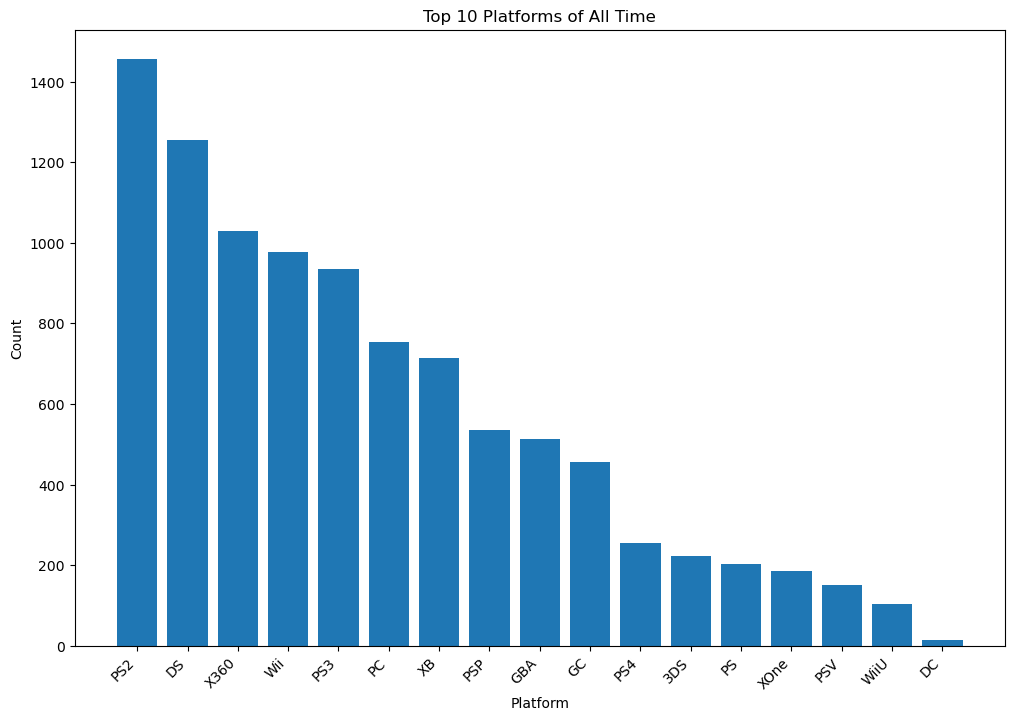

In [13]:
top10_platform = df['Platform'].value_counts().head(20)

plt.figure(figsize=(12, 8))
plt.title('Top 10 Platforms of All Time')
plt.bar(top10_platform.index, top10_platform)

# Add labels and rotate x-axis labels for better visibility
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Display the bar plot
plt.show()


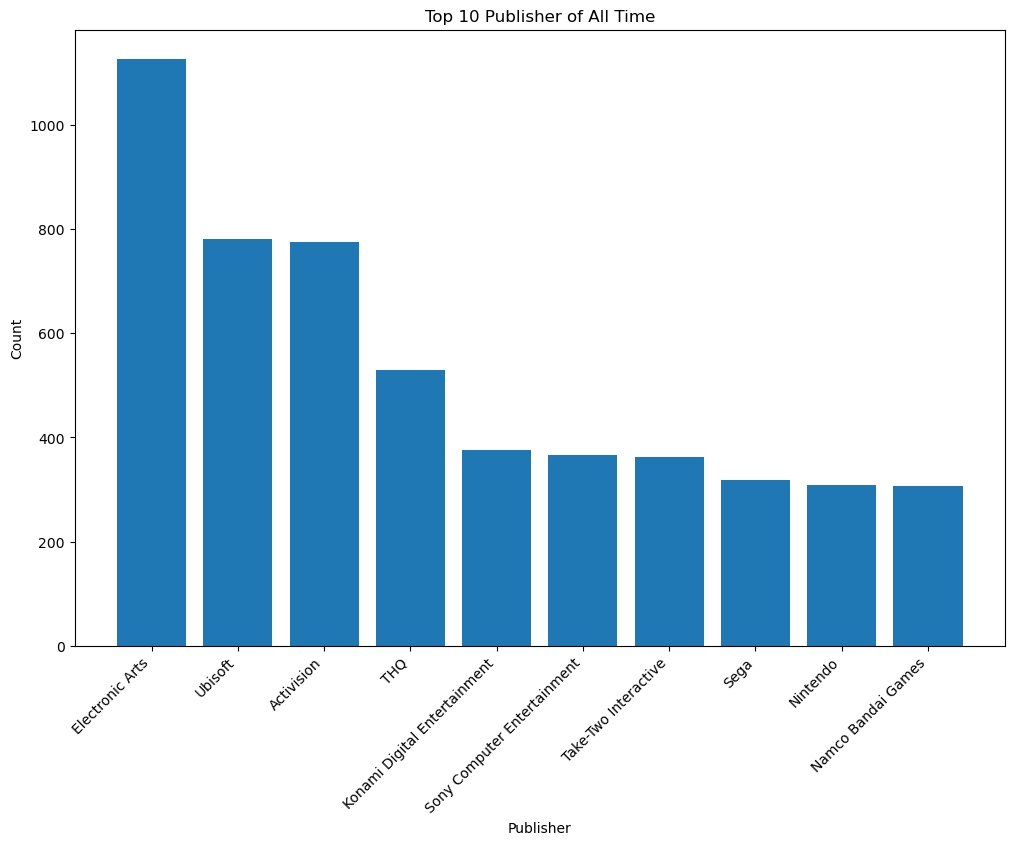

In [14]:
top10_publisher=df['Publisher'].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.title('Top 10 Publisher of All Time')
plt.bar(top10_publisher.index, top10_publisher)

# Add labels and rotate x-axis labels for better visibility
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Display the bar plot
plt.show()

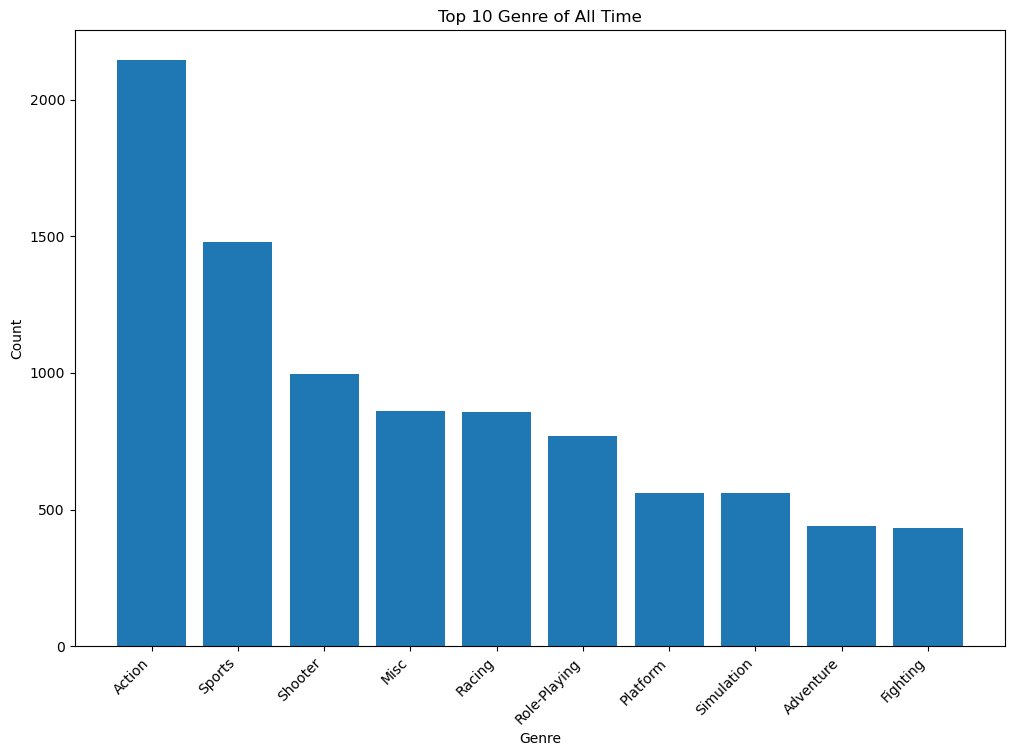

In [15]:
top10_genre=df['Genre'].value_counts().head(10)


top10_platform = df['Platform'].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.title('Top 10 Genre of All Time')
plt.bar(top10_genre.index, top10_genre)

# Add labels and rotate x-axis labels for better visibility
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Display the bar plot
plt.show()


The Top Platform Chart shows PS2 with the highest count of missing values, followed by DS, and then X360.Among the Publishers ,Electronic Art is the one with the highest followed by Ubisoft and Activision.
Based on Genres of Video Games , Action Games Proves to be the highest in terms of count ,followed by Sport and Shooter games

## 1. Which of the variables in the video game dataset or a combination of them best predicts “global sales” of video games and why?

In [8]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix = df[numerical_cols].corr()
correlation_with_global_sales = correlation_matrix['Global_Sales'].sort_values(ascending=False)
correlation_with_global_sales


Global_Sales       1.000000
NA_Sales           0.941010
EU_Sales           0.901239
Other_Sales        0.749242
JP_Sales           0.612300
Critic_Count       0.303571
User_Count         0.265012
Critic_Score       0.245471
Year_of_Release   -0.076433
Name: Global_Sales, dtype: float64

In [122]:
X = df[['Critic_Score', 'User_Score','User_Count','Critic_Count', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate RMSE for the training data
rmse_train = mean_squared_error(y_train, y_train_pred)
# Calculate RMSE for the training data
mae_train = mean_absolute_error(y_train, y_train_pred)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Train Mean Absolute Error:", mae_train)
print("Mean Absolute Error:", mae)
print("Train Mean Squared Error:", rmse_train)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Train Mean Absolute Error: 0.0035753473561915125
Mean Absolute Error: 0.003723960524547377
Train Mean Squared Error: 3.357619137299526e-05
Mean Squared Error: 3.524322754414229e-05
R-squared: 0.9999943171906612


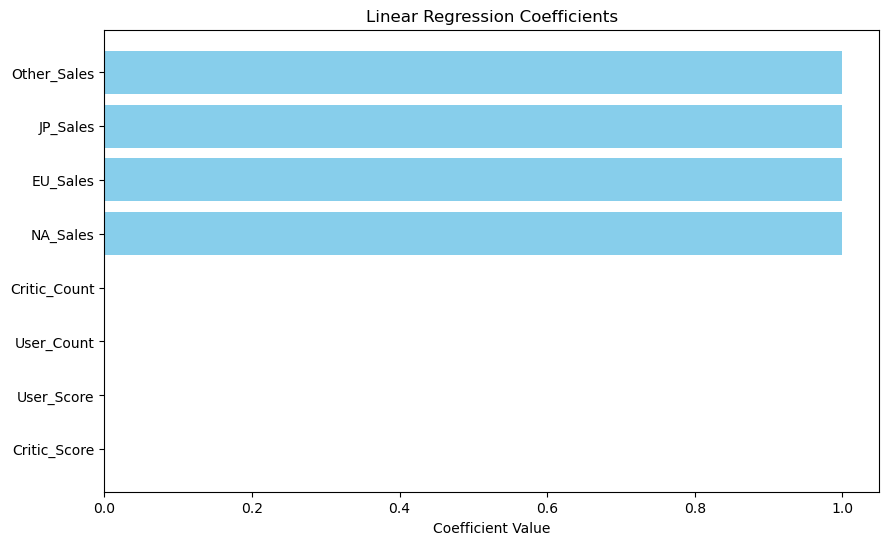

In [123]:
# Get the coefficients and feature names
coefficients = model.coef_
feature_names = X.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.show()


In [46]:
X = sm.add_constant(df[['Critic_Score', 'User_Score','User_Count','Critic_Count', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
y = df['Global_Sales']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.830e+07
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:16:53   Log-Likelihood:                 36005.
No. Observations:                9661   AIC:                        -7.199e+04
Df Residuals:                    9652   BIC:                        -7.193e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0006      0.000      1.512   


In the conducted Ordinary Least Squares (OLS) regression analysis on the video game dataset, the primary aim was to identify variables or combinations of variables that best predict "Global_Sales" of video games. The regression results revealed several key findings:

1. Significant Predictors:
   - Among the examined variables, the regional sales figures (NA_Sales, EU_Sales, JP_Sales, Other_Sales) emerged as highly significant predictors of global sales. Their coefficients were close to 1, with very low p-values, indicating a strong positive relationship between sales in each region and the overall global sales.

2. Insignificant Predictors:
   - Variables such as Critic_Score, User_Score, User_Count, and Critic_Count did not exhibit statistical significance. Their coefficients were close to zero, and the p-values were higher than the conventional significance level of 0.05. This implies that these variables, in isolation, do not significantly contribute to predicting global sales.


 The most robust predictors of global sales are the regional sales figures, while other variables, such as critic and user scores, do not significantly contribute to predicting overall sales.

## 2. What effect will the number of critics and users as well as their review scores have on the sales of Video games in North America, EU and Japan?

In [47]:
correlation_sales_na = df[['Critic_Count', 'User_Count', 'Critic_Score', 'User_Score', 'NA_Sales']].corr()['NA_Sales']
correlation_sales_eu = df[['Critic_Count', 'User_Count', 'Critic_Score', 'User_Score', 'EU_Sales']].corr()['EU_Sales']
correlation_sales_jp = df[['Critic_Count', 'User_Count', 'Critic_Score', 'User_Score', 'JP_Sales']].corr()['JP_Sales']

print("Correlation with NA Sales:\n", correlation_sales_na)
print("Correlation with EU Sales:\n", correlation_sales_eu)
print("Correlation with JP Sales:\n", correlation_sales_jp)


Correlation with NA Sales:
 Critic_Count    0.300536
User_Count      0.245040
Critic_Score    0.231616
User_Score      0.077725
NA_Sales        1.000000
Name: NA_Sales, dtype: float64
Correlation with EU Sales:
 Critic_Count    0.282739
User_Count      0.284868
Critic_Score    0.212403
User_Score      0.048680
EU_Sales        1.000000
Name: EU_Sales, dtype: float64
Correlation with JP Sales:
 Critic_Count    0.198845
User_Count      0.074694
Critic_Score    0.139197
User_Score      0.115607
JP_Sales        1.000000
Name: JP_Sales, dtype: float64


In [48]:
X = df[['Critic_Count', 'User_Count', 'Critic_Score', 'User_Score']]
y_na = df['NA_Sales']
y_eu = df['EU_Sales']
y_jp = df['JP_Sales']


# For North America

model_na = LinearRegression()
model_na.fit(X, y_na)

coefficients_na = model_na.coef_
print("Regression Coefficients for NA Sales:", coefficients_na)

X_na = sm.add_constant(X)
model_na = sm.OLS(y_na, X_na).fit()
print(model_na.summary())

# For Europe
model_eu = LinearRegression()
model_eu.fit(X, y_eu)

coefficients_eu = model_eu.coef_
print("Regression Coefficients for NA Sales:", coefficients_eu)

X_eu = sm.add_constant(X)
model_eu = sm.OLS(y_eu, X_eu).fit()
print(model_eu.summary())

# For Japan
model_jp = LinearRegression()
model_jp.fit(X, y_jp)

coefficients_jp = model_jp.coef_
print("Regression Coefficients for NA Sales:", coefficients_jp)


X_jp = sm.add_constant(X)
model_jp = sm.OLS(y_jp, X_jp).fit()
print(model_jp.summary())



Regression Coefficients for NA Sales: [ 0.00968574  0.00024575  0.00769536 -0.01326154]
                            OLS Regression Results                            
Dep. Variable:               NA_Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     335.9
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          4.23e-271
Time:                        15:17:04   Log-Likelihood:                -11181.
No. Observations:                9661   AIC:                         2.237e+04
Df Residuals:                    9656   BIC:                         2.241e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### North America Sales:
- **Critic_Count:** When the number of critics reviewing a game goes up by one, the sales in North America tend to increase by about 0.0092 units.
- **User_Count:** More users playing a game is associated with a small increase of about 0.0002 units in North America sales.
- **Critic_Score:** If a game gets a higher score from critics, North America sales tend to go up by about 0.0084 units.
- **User_Score:** Interestingly, when users give a game a higher score, it seems to be associated with a slight decrease of about 0.0105 units in North America sales.

### European Union Sales:
- **Critic_Count:** An increase in the number of critics is linked to a rise of about 0.0056 units in EU sales.
- **User_Count:** More users playing a game is associated with a small increase of about 0.0002 units in EU sales.
- **Critic_Score:** A game getting a higher score from critics is connected to an increase of about 0.0056 units in EU sales.
- **User_Score:** Interestingly, a higher user score is associated with a decrease of about 0.0173 units in EU sales.

### Japan Sales:
- **Critic_Count:** When the number of critics goes up by one, Japan sales tend to increase by about 0.0020 units.
- **User_Count:** Surprisingly, the number of users doesn't seem to have a significant impact on Japan sales in this model.
- **Critic_Score:** If a game gets a higher score from critics, Japan sales tend to go up by about 0.0010 units.
- **User_Score:** When users give a higher score, Japan sales tend to increase by about 0.0138 units.


In simple terms, these results help us understand how different factors, like critic scores, user scores, and the number of critics or users, might influence video game sales in different regions.

# Feature Engineering

In [17]:
# Remove years before 2000 and after 2016
df = df[(df['Year_of_Release'] <= 2016) & (df['Year_of_Release'] >= 2000)]

def regroup_by_quantiles(df, column):
    # Calculate the frequency of each category
    freq = df[column].value_counts()
    
    # Determine the quantile thresholds
    threshold_40 = freq.quantile(0.30)
    threshold_80 = freq.quantile(0.60)
    
    # Define new categories based on frequency thresholds
    def categorize(value):
        if freq[value] <= threshold_40:
            return 'Unpopular'
        elif freq[value] <= threshold_80:
            return 'Average'
        else:
            return value
    
    # Apply the categorization
    df[column] = df[column].apply(categorize)
    
    return df

# Regroup the columns based on their frequency using quantiles
df = regroup_by_quantiles(df, 'Platform')
df = regroup_by_quantiles(df, 'Publisher')


print(df["Publisher"].nunique())
print(df["Developer"].nunique())
print(df["Platform"].nunique())

126
1646
9


Starting with the Feature Engineering ,I filtered only years between 2000 and 2016 because based on our analysis those years have very low vigeo games adoption,Then the "Platform" and "Publisher" columns is been regrouped based on their frequency using quantiles to reduce the high number of categories

In [19]:
# Remove specific categories from the 'Rating' column
df = df[~df['Rating'].isin(['EC', 'AO', 'RP'])]

In [18]:
#Feature Generation
df['Average_Score'] = (df['Critic_Score'] + df['User_Score']) 
df['Score_Difference'] = df['Critic_Score'] - df['User_Score'] 
df['Total_Reviews'] = df['User_Count'] + df['Critic_Count']
df['Sales_per_Review'] = df['Global_Sales'] / df['Total_Reviews']
df['Critic_Engagement'] = df['Critic_Count'] / df['Critic_Score']

df.drop(["Name","Developer"],axis=1,inplace=True)

#Drop NA_Sales, EU_Sales, JP_Sales, Other_Sales because of the high correlation between them and global sales  
df.drop(["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],axis=1,inplace=True)

# Checking the first few rows to ensure encoding worked
df.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Average_Score,Score_Difference,Total_Reviews,Sales_per_Review,Critic_Engagement
0,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,8.0,322.0,E,84.0,68.0,373.0,0.221260,0.671053
2,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,E,90.3,73.7,782.0,0.045422,0.890244
3,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0,E,88.0,72.0,265.0,0.123660,0.912500
6,DS,2006.0,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,E,97.5,80.5,496.0,0.060081,0.730337
7,Wii,2006.0,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,E,64.6,51.4,170.0,0.170118,0.706897


1. **Feature Generation:**
   - Created a new feature called `Average_Score`, which is the sum of `Critic_Score` and `User_Score`.
   - Created another new feature called `Score_Difference`, which is the difference between `Critic_Score` and `User_Score`.
   - Created `Total_Reviews`, which is the sum of `User_Count` and `Critic_Count`.
   - Calculated `Sales_per_Review` by dividing `Global_Sales` by `Total_Reviews`.
   - Calculated `Critic_Engagement` by dividing `Critic_Count` by `Critic_Score`.

2. **Data Preprocessing:**
   - Dropped the columns `Name` and `Developer` from the dataset.
   - Dropped columns related to regional sales (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`) due to high correlation with `Global_Sales`.


## Model Training

In [51]:
df.head()

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Genre_Action,Genre_Adventure,Genre_Fighting,...,Publisher_Zushi Games,Platform_Average,Platform_DS,Platform_PC,Platform_PS2,Platform_PS3,Platform_Unpopular,Platform_Wii,Platform_X360,Platform_XB
0,2006.0,82.53,76.0,51.0,8.0,322.0,E,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2008.0,35.52,82.0,73.0,8.3,709.0,E,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2009.0,32.77,80.0,73.0,8.0,192.0,E,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,2006.0,29.80,89.0,65.0,8.5,431.0,E,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,2006.0,28.92,58.0,41.0,6.6,129.0,E,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, make_scorer, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import pandas as pd

# Assuming df is your DataFrame and "Rating" is the target variable
X = df.drop("Rating", axis=1)
y = df["Rating"]

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Identify categorical and numerical columns
categorical_cols = ['Genre', 'Publisher', 'Platform']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Create a pipeline that includes preprocessing and the XGBoost model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', xgb_clf)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model pipeline
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred,)
f1_score = f1_score(y_test, y_pred,average='macro')

# Print results
print(f"Results for Ratings:")
print("Accuracy:", accuracy)
print("precision_score:", precision_score)
print("Recall:", recall)
print("f1_score:", f1_score)
print("Classification Report:\n", report)
print("\n" + "="*50 + "\n")

Results for Ratings:
Accuracy: 0.7068876229932677
precision_score: 0.6767893248056291
Recall: 0.6477266089980818
f1_score: 0.6560983190535477
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       737
           1       0.57      0.38      0.46       265
           2       0.70      0.68      0.69       335
           3       0.67      0.64      0.66       594

    accuracy                           0.71      1931
   macro avg       0.68      0.65      0.66      1931
weighted avg       0.70      0.71      0.70      1931





A machine learning pipeline has been built to predict video game ratings.Pandas is utilized for data manipulation, sklearn for preprocessing tasks such as encoding and handling missing values, and XGBoost for prediction, which is recognized for its accuracy with complex data.

The simplified flow is as follows:
- Data management is done using pandas.
- Data preprocessing, including encoding and handling missing values, is carried out using sklearn.
- XGBoost is employed for prediction.
- The data is split into training and testing sets.
- The model is trained on the training data.
- Model accuracy, precision, recall, and F1-score are evaluated on the test data.

This streamlined pipeline ensures that accurate predictions are made for video game ratings.

The model's performance can be evaluated based on the provided metrics:

1. **Accuracy (0.7069):** This metric indicates the overall correctness of the model's predictions. An accuracy of 0.7069 suggests that about 71% of the predictions made by the model are correct.

2. **Precision (0.6768):** Precision reflects the model's ability to correctly identify positive instances among all instances predicted as positive. A precision score of 0.6768 means that approximately 68% of the instances predicted as positive are actually positive.

3. **Recall (0.6477):** Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive instances among all actual positive instances. A recall of 0.6477 indicates that around 65% of actual positive instances are correctly identified by the model.

4. **F1-score (0.6561):** The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. A higher F1-score (0.6561 in this case) suggests a good balance between precision and recall.

Overall, the model appears to have decent performance based on these metrics.



[[654  29   4  50]
 [ 99 101   7  58]
 [ 11  13 227  84]
 [ 94  33  84 383]]


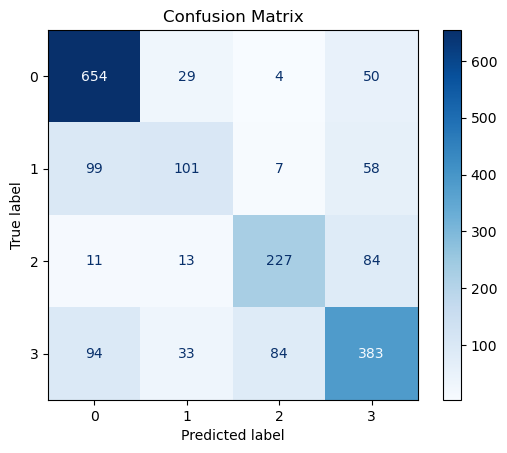

In [31]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_true are the true labels and y_pred are the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [33]:
# Create a new DataFrame with the same columns as your training data
new_data = pd.DataFrame(columns=['Year_of_Release','Platform', 'Genre', 'Publisher', 'Global_Sales',
                                 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count','Average_Score', 'Score_Difference', 'Total_Reviews',
       'Sales_per_Review', 'Critic_Engagement'])

# Input your new values into the DataFrame
new_data.loc[0] = [2000,'PS4', 'Action', 'Ubisoft', 5.6, 70, 100, 7.5, 500,84.0,68.0,373.0,0.221260,0.671053]

# Use the trained model to make predictions
new_predictions = model_pipeline.predict(new_data)

# Decode the predicted labels if you want to get the actual ratings
decoded_predictions = label_encoder.inverse_transform(new_predictions)

# Print the predicted ratings
print("Predicted Ratings:", decoded_predictions)


Predicted Ratings: ['T']


In [39]:
import pickle

# Save the model to a file
with open('model_pipeline.pkl', 'wb') as file:
    pickle.dump(model_pipeline, file)

print("Model saved successfully!")


Model saved successfully!
